#N2 Method

This simplified nonlinear procedure for the estimation of the seismic response of structures uses capacity curves and inelastic spectra. This method has been developed to be combined with code-bsed response spectra, but is is also possible to employ it to assess structural response against ground motion records. It also has the distinct aspect of assuming an elasto-perfectly plastic force-displacement relationship in the construction of the bilinear curve.

In the following figure, a fragility model developed using this method is presented: 
<img src="../../../../../figures/fragility_example.png" height="200" width="400" align="middle">

##Load capacity curves

In order to use this methodology, it is necessary to provide one (or a group) of capacity curves, defined according to the format established on the [RMTK manual](../../../../../rmtk-docs.pdf). Please provide the location of the folder containing this input using the parameter input_folder.

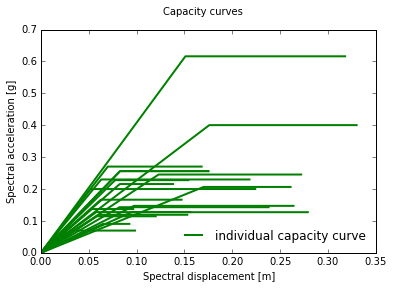

In [3]:
from rmtk.vulnerability.common import utils
%matplotlib inline 

capacity_curves_file = '../../../../../../rmtk_data/capacity_curves_Sa-Sd.csv'
capacity_curves = utils.read_capacity_curves(capacity_curves_file)
utils.plot_capacity_curves(capacity_curves)

## Load ground motion records

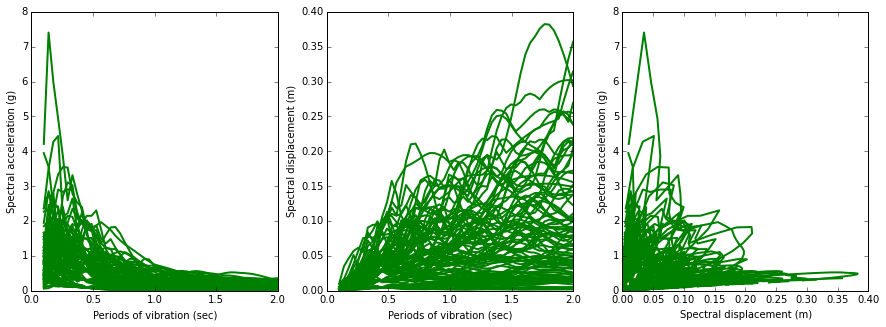

In [3]:
gmrs_folder = '../../../../../../rmtk_data/accelerograms'
gmrs = utils.read_gmrs(gmrs_folder)
minT = 0.1
maxT = 2
utils.plot_response_spectra(gmrs,minT,maxT)

##Calculate fragility function


In [4]:
import N2Method

damage_model = utils.read_damage_model('../../../../../../rmtk_data/damage_model.csv')
print damage_model
damping = 0.05
T = 2.0
PDM, Sds = N2Method.calculate_fragility(capacity_curves,gmrs,damage_model,damping)
fragility_model = utils.calculate_mean_fragility(gmrs,PDM,T,damping,'Sa',damage_model)
utils.plot_fragility_model(fragility_model,0.01,2)

{'damage_states': ['Slight', 'Moderate', 'Extensive', 'Collapse'], 'cov': [0.05, 0.05, 0.05, 0.05], 'type_criteria': 'capacity curve dependent', 'type_damage_state': ['fraction Sdy', 'Sdy', 'mean Sdy Sdu', 'Sdu'], 'distribution': ['normal', 'normal', 'normal', 'normal'], 'mean': [0.5, '0.05', '0.05', '0.05']}


NameError: name 'gmrs' is not defined